In [1]:
import pandas as pd

df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
Y = df["success"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

print(model.score(X_test, Y_test))

# gibt die Wahrscheinlichkeit aus
# gibt immer 2 Werte aus Wahrscheinlichkeit für 0 in erster Spalte und für 1 in zweiter Spalte
# [:,1] ich möchte nur die zweite Spalte haben
Y_test_pred = model.predict_proba(X_test)[:,1]

0.88


/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
# die Wahrscheinlichkeit, dass eine 1 zutrifft
Y_test_pred

array([0.98558071, 0.37979061, 0.02796166, 0.78868367, 0.99257742,
       0.02521476, 0.12499392, 0.9920774 , 0.99905285, 0.81775052,
       0.54103887, 0.92853954, 0.08797277, 0.98590813, 0.99958218,
       0.99220668, 0.16414201, 0.02309097, 0.16500396, 0.9578281 ,
       0.89727838, 0.99659803, 0.15959031, 0.79192576, 0.2276523 ,
       0.30378579, 0.73988003, 0.31366755, 0.99829859, 0.98725028,
       0.18086766, 0.52005224, 0.2221615 , 0.08622557, 0.83235227,
       0.99329488, 0.05521368, 0.51159633, 0.32591419, 0.99352668,
       0.25200922, 0.00505993, 0.75114303, 0.97117611, 0.97369324,
       0.97907546, 0.94487503, 0.84070844, 0.39260474, 0.98378678,
       0.55811911, 0.90632768, 0.98943325, 0.05340391, 0.94316134,
       0.21677425, 0.52816489, 0.99813435, 0.33014554, 0.00293469,
       0.00236297, 0.03579841, 0.86390921, 0.58462835, 0.63451198,
       0.16266141, 0.98654272, 0.31047163, 0.98219686, 0.99316657,
       0.04259802, 0.66434226, 0.00200548, 0.95000693, 0.96684

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

In [9]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)

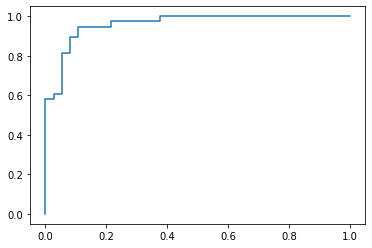

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.show()

In [13]:
roc_auc_score(Y_test, Y_test_pred)

0.9601706970128023